## Week 11 - Final Assignment

#### Student: Adriana Fedco (10366699); Elina Spinu (10095404);


In [210]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [211]:
D0 = 49.1
T_list=[873,1023,1073]
time_list = [5,10,15,60,120]
grainsize3_list = [ 80, 79.9,95,175.5, 169.7]


$$\ln(D-Do)=\ln(K)+n\ln(t)$$


In [212]:
grainfinal_list =[30.9,30.8,45.9,126.4,120.6]
D8 = np.array(grainfinal_list)
t = np.array(time_list)
ln_D8 = np.log(D8)
ln_t = np.log(t)

Text(0, 0.5, 'ln grain')

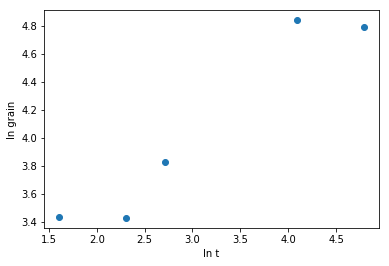

In [213]:
plt.plot(ln_t,ln_D8,'o')
plt.xlabel('ln t')
plt.ylabel('ln grain')

In [214]:
from scipy.optimize import curve_fit

In [215]:
def line(x,m,c):
    y=m*x+c
    return y


In [216]:
fit_params=curve_fit(line,ln_t,ln_D8)

In [217]:
m=fit_params[0][0]
c=fit_params[0][1]


In [218]:
ln_D_fit=line(ln_t,m,c)

Text(0, 0.5, 'ln grain')

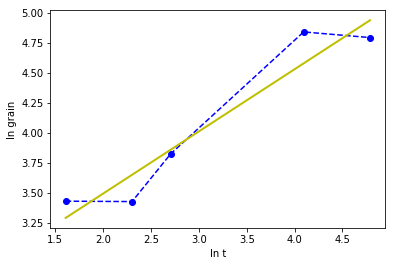

In [219]:
plt.plot(ln_t,ln_D8,'bo--')
plt.plot(ln_t,ln_D_fit,'y',lw=2)
plt.xlabel('ln t')
plt.ylabel('ln grain')

In [220]:
n = m 
K3 = np.exp(c)
print ('n=',n)
print ('K=',K3)

n= 0.5176841366476251
K= 11.685103418536942


In [221]:
def arrhenius0(D_vals,t_vals):
    
    D=np.array(D_vals)
    t=np.array(t_vals)
    ln_D=np.log(D)
    ln_t=np.log(t)
    fit_params=curve_fit(line,ln_t,ln_D)
    m=fit_params[0][0]
    c=fit_params[0][1]
    n = m
    K = np.exp(c)
    print('K =',K)
    

In [222]:
D1_list =[6.8,13.2,11.6,22.5,16.4]
D2_list =[72.8-D0,70.9-D0,81.2-D0,95.4-D0,93.4-D0]
arrhenius0(D1_list,time_list)
arrhenius0(D2_list,time_list)
arrhenius0(grainfinal_list,time_list)


K = 5.448097144240181
K = 15.074415522642573
K = 11.685103418536942


K at 1073K = 11.68
K at 1023K = 15.07
K at 873K = 5.44

In [223]:
K_list =[5.44,15.07,11.68]

$$\ln(K)= \ln(Ko)-Ea/R* 1/T$$

In [224]:
def arrhenius(K_vals,T_vals):
    
    K=np.array(K_vals)
    T=np.array(T_vals)
    ln_K=np.log(K)
    inv_T=1/T
    fit_params=curve_fit(line,inv_T,ln_K)
    m=fit_params[0][0]
    c=fit_params[0][1]
    Ea=-8.314*m
    Ko=np.exp(c)
    print("Ea =",Ea)
    print('Ko =',Ko)
    return Ea,Ko


In [225]:
arrhenius(K_list,T_list)

Ea = 35358.63189869943
Ko = 749.1470060632831


(35358.63189869943, 749.1470060632831)

### Linear intercept method

In [14]:
def get_boundaries(fname, thresh_offset=0.04, small_objects=250, show_figure=True ):
    '''Uses edge filtering and thresholding to give clean grain boundaries
    
    Keywords:
    thresh_offset -- threshold offset
    small_objects -- size of window used to remove small objects in pixels
    figure -- show the thresholded and original image
    '''
    
    # read image in and threshold
    image=io.imread(fname)
    image=rgb2gray(image)
    edge=sobel(image)
    edge=edge>thresh_offset
    edge=closing(edge,disk(3))
    edge=remove_small_objects(edge,min_size=small_objects)
    thin_boundaries=skeletonize(edge)
    
    if (show_figure):
        # compare original and thresholded
        f,ax=plt.subplots(1,2,figsize=(16,9))
        ax[0].imshow(image,cmap='gray',origin='bottom')
        # we use dilation here for visualization purposes only
        ax[1].imshow(dilation(thin_boundaries,square(3)),cmap='gray',origin='bottom') 
    
    return thin_boundaries

In [15]:
def measure_grain(edge_image, step_size=100, min_distance=0, image_file=None):
    ''' Measure grain size by the linear intercept method. 
    Inputs:
    thresh_image -- binary image of grain boundaries (from thresh_and_clean)

    Keywords:
    step_size -- distance in pixels between intercept lines
    min_distance -- minimum distance allowed between intercepts in pixels
    image_file -- filename of image to be used to display intercepts
    '''
        
    #find intercepts and distances
    rows=range(step_size,np.shape(edge_image)[0],step_size) # the rows 
    cols=range(step_size,np.shape(edge_image)[1],step_size) # the columns 

    row_intercepts_list=[]
    col_intercepts_list=[]
    row_counts_list=[]
    col_counts_list=[]
    
    for row in rows:
        line=edge_image[row,:]
        row_intercepts=np.where(line==1)[0]
        row_distances=np.ediff1d(row_intercepts,to_end=step_size)
        row_intercepts_filtered=row_intercepts[np.where(row_distances>min_distance)[0]]
        row_counts=np.size(row_intercepts_filtered)
        row_intercepts_list.append(row_intercepts_filtered)
        row_counts_list.append(row_counts)
        
    for col in cols:
        line=edge_image[:,col]
        col_intercepts=np.where(line==1)[0]
        col_distances=np.ediff1d(col_intercepts,to_end=step_size)
        col_intercepts_filtered=col_intercepts[np.where(col_distances>min_distance)[0]]
        col_counts=np.size(col_intercepts_filtered)
        col_intercepts_list.append(col_intercepts_filtered)
        col_counts_list.append(col_counts)
    
    
    #calculate mean distances
    x_size=np.shape(edge_image)[1]/np.mean(col_counts_list)
    y_size=np.shape(edge_image)[0]/np.mean(col_counts_list)

    #plot image and measured intercepts
    if (image_file):
        
        original_image=io.imread(image_file)
        io.imshow(original_image)

        for row,points in zip(rows,row_intercepts_list):
            plt.axhline(row,color='y')
            yvals=np.ones(np.shape(points))*row
            plt.plot(points,yvals,'go',alpha=0.7)

        for col,points in zip(cols,col_intercepts_list):
            plt.axvline(col,color='y')
            xvals=np.ones(np.shape(points))*col
            plt.plot(xvals,points,'bo',alpha=0.7)

        plt.xlim(0,np.shape(edge_image)[1])
        plt.ylim(0,np.shape(edge_image)[0])

        print('X distance from intercepts: {:2.2f} pixels'.format(x_size))
        print('Y distance from intercepts: {:2.2f} pixels'.format(y_size))

    return [x_size,y_size]

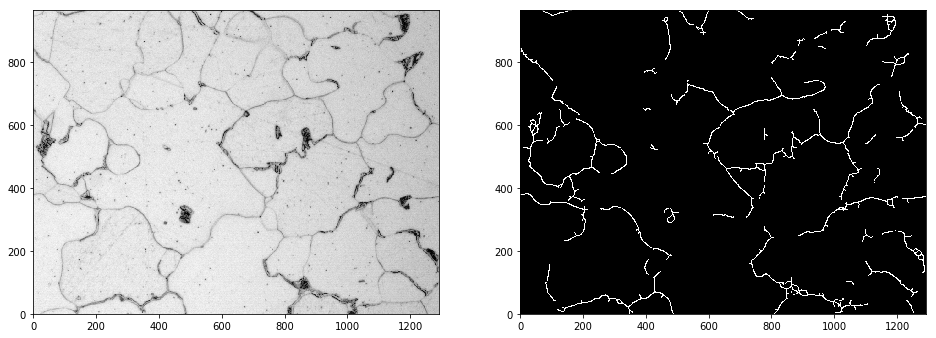

In [67]:
edge_sample=get_boundaries('incident_sample5.png',thresh_offset=0.070,small_objects=200)

X distance from intercepts: 287.11 pixels
Y distance from intercepts: 215.11 pixels


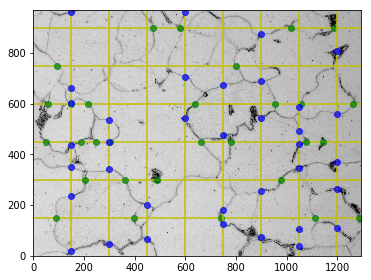

In [68]:
formean=measure_grain(edge_sample, step_size=150, min_distance=30,image_file='incident_sample5.png')

In [66]:
print('Mean grain size = {:2.2f} pixels.'.format(np.mean(formean)))

Mean grain size = 251.11 pixels.


Using ImageJ: 100 μm = 233 pixels

251.11 pixels = 107.77... 
μm 
#### The grain grain size is 108 μm

## Conclusion 

$$\ln(D-Do)=\ln(K)+n\ln(t)$$

$$\ln(K)= \ln(Ko)-Ea/R* 1/T$$

Eliminating the variable K gives $$ T= \frac{-Ea}{R}  \frac {1}{ln(\frac{D-Do}{t^nKo})} $$ 

 Where T is the temperature, Ea is the activation energy, R is the gas constant, Do is starting grain size, t is the time, D is the grain size at time t and n is a parameter independent of temperature.

Assuming the fire lasted 2 hours

$$ T= \frac{-35358}{8.314}  \frac {1}{ln(\frac{108-49.1}{120^{0.51768}\times749})}=847  K $$

 The two hypothesis for why the structure collapsed:
 - the structure became too hot because not enough water was used to cool the fire;
 - the steel failed at a temperature at which it should not;

According to the results provided by the laboratory test carried on samples from a region of the building not affected by the fire.
The grain size of the steel sample after being heated for 120 minutes at 800 C is 169.7 μm 

The grain size of the incident sample is considerable lower. 108 μm vs 179 μm
Therefore the steel failed at a temperature which it should not.